## **AUTO MPG**

---

- auto mpg dataset을 이용해 mpg 예측 모델 생성

In [496]:
import pandas as pd
from urllib.request import urlopen, urlretrieve

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
FILE = 'auto.csv'

In [497]:
df = pd.read_csv(url, sep = '\s+', header=None)

In [498]:
df.head()

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [499]:
df.columns=['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model-year', 'origin', 'car-name']

In [500]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model-year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car-name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [501]:
kpl = 1.60934/3.78541
print(kpl)

df['kpl'] = df['mpg']*kpl
df['kpl'].round(2)
df.head()

0.42514285110463595


,mpg,cylinders,displacement,horsepower,weight,acceleration,model-year,origin,car-name,kpl
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,7.652571
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,6.377143
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,7.652571
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,6.802286
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,7.227428


In [502]:
import numpy as np
df.replace('?' or 0, np.nan, inplace=True)

In [503]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model-year      0
origin          0
car-name        0
kpl             0
dtype: int64

In [504]:
# 엔진출력 = 수치형, 출시연도, 출시국가 = 범주형으로 타입 변경
df['horsepower'] = df['horsepower'].astype('float64')
df['origin'] = df['origin'].astype('category')
#df['model-year'] = df['model-year'].astype('category')

In [505]:
df.dropna(subset=['horsepower'], inplace=True)

In [506]:
df.duplicated().sum()

0

In [507]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model-year,origin,car-name,kpl
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,7.652571
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,6.377143
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,7.652571
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,6.802286
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,7.227428


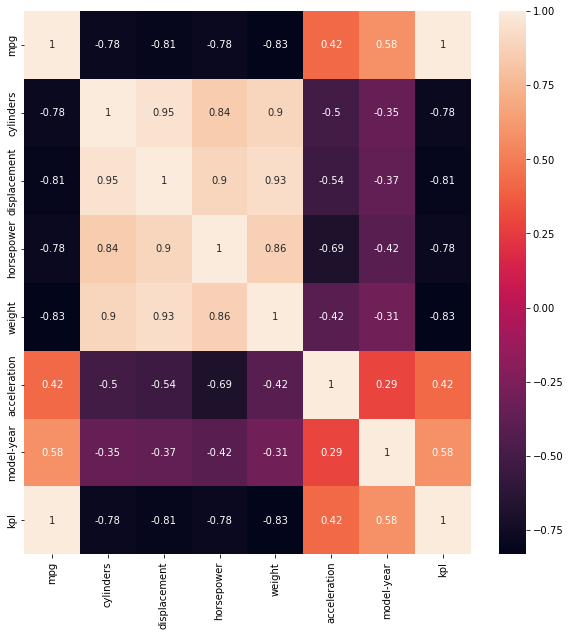

kpl             1.000000
mpg             1.000000
model-year      0.580541
acceleration    0.423329
cylinders      -0.777618
horsepower     -0.778427
displacement   -0.805127
weight         -0.832244
Name: mpg, dtype: float64


In [508]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True)
plt.show()

corr_mat=df.corr()
print(corr_mat["mpg"].sort_values(ascending=False))

In [509]:
from sklearn.preprocessing import StandardScaler, minmax_scale

data= df.drop(['mpg','kpl','car-name','origin','acceleration'],axis='columns')
target = df['kpl']

ss = StandardScaler()
scaled_data = ss.fit_transform(data)

In [510]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    scaled_data, target, random_state=42, test_size=0.2
)

train_input.shape, train_target.shape, test_input.shape, test_target.shape

((313, 5), (313,), (79, 5), (79,))

In [511]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_input, train_target)
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.8105442443714308
0.7931645680840771


In [512]:
from sklearn.utils import all_estimators
# 오류 무시
import warnings
warnings.filterwarnings("ignore")

models = all_estimators(type_filter='regressor')

scores = []
model_name = []
for name, model in models:
    try:
        # 모델 객체 생성
        md = model()
        model_name.append(name)


        # 학습
        md.fit(train_input, train_target)
        # 평가
        if md.score(train_input, train_target) < 0.8 or md.score(test_input, test_target) < 0.8:
            pass
        else:
            scores.append((md.score(train_input, train_target),md.score(test_input, test_target)))
    except :
        pass

In [513]:
for i in range(len(scores)):
    print('[{}]train score : {}, test score : {}'.format(model_name[i], scores[i][0], scores[i][1]))

[ARDRegression]train score : 0.9066422101758487, test score : 0.8208763873883679
[AdaBoostRegressor]train score : 0.9783882811046216, test score : 0.8727146652892339
[BaggingRegressor]train score : 0.9990883200735734, test score : 0.8920152279425642
[BayesianRidge]train score : 0.8033014690506614, test score : 0.8269408959063325
[CCA]train score : 0.96544772840577, test score : 0.8751958904375092
[DecisionTreeRegressor]train score : 0.9517151297412872, test score : 0.8632936927595374
[DummyRegressor]train score : 0.9084275105946893, test score : 0.8574609558206475
[ElasticNet]train score : 0.8775916667128253, test score : 0.8762486121091765
[ElasticNetCV]train score : 0.8592576663360707, test score : 0.8551428242176387
[ExtraTreeRegressor]train score : 0.8680142827144758, test score : 0.8527952148349806
[ExtraTreesRegressor]train score : 0.9814568208166928, test score : 0.8826304072545267
[GammaRegressor]train score : 0.8759365727700236, test score : 0.8729947117708468


In [514]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [515]:
model = Sequential(name = 'auto_mpg')

In [516]:
l1 = Dense(64, activation = 'relu', input_shape = (5,), name = 'first')
l2 = Dense(64, activation = 'relu', name = 'layer_1')
l3 = Dense(1, activation = 'linear', name = 'last')

In [517]:
model.add(l1)
model.add(l2)
model.add(l3)

In [518]:
model.summary()

Model: "auto_mpg"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 first (Dense)               (None, 64)                384       
                                                                 
 layer_1 (Dense)             (None, 64)                4160      
                                                                 
 last (Dense)                (None, 1)                 65        
                                                                 
Total params: 4,609
Trainable params: 4,609
Non-trainable params: 0
_________________________________________________________________


In [522]:
optimizer = tf.keras.optimizers.RMSprop(0.001)
model.compile(optimizer='adam', loss = 'mean_squared_error', metrics=['mean_squared_error'])

In [523]:
model.fit(train_input, train_target, epochs = 100)

Epoch 1/100
10/10 [==============================] - 1s 1ms/step - loss: 1.3560 - mean_squared_error: 1.3560
Epoch 2/100
10/10 [==============================] - 0s 1ms/step - loss: 1.3162 - mean_squared_error: 1.3162
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 1.3093 - mean_squared_error: 1.3093
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 1.2984 - mean_squared_error: 1.2984
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 1.2858 - mean_squared_error: 1.2858
Epoch 6/100
10/10 [==============================] - 0s 1ms/step - loss: 1.2816 - mean_squared_error: 1.2816
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 1.2731 - mean_squared_error: 1.2731
Epoch 8/100
10/10 [==============================] - 0s 1ms/step - loss: 1.2756 - mean_squared_error: 1.2756
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 1.2710 - mean_squared_error: 1.2710
Epoch 10/100
10/10 

In [524]:
model.evaluate(train_input, train_target)

10/10 [==============================] - 0s 886us/step - loss: 1.0025 - mean_squared_error: 1.0025


[1.0024689435958862, 1.0024689435958862]